# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** M. Dwi Pratama
- **Email:** muhammaddwipratama0@gmail.com  
- **ID Dicoding:** mdpraz

## Menentukan Pertanyaan Bisnis

Pertanyaan dibuat dengan memperhatikan konsep SMART
- Bagaimanakah tren jumlah sewa bike sharing dalam pertahun?
- Bagaimanakah pengaruh dari musim terhadap jumlah sewa bike sharing?
- Bagaimanakah pengaruh cuaca terhadap jumlah sewa bike sharing?
- Bagaimanakah perbandingan user registered dengan casual?



## Import Semua Packages/Library yang Digunakan

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [13]:
df_day = pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')

In [14]:
df_day.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [15]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [16]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [17]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Cleaning Data

In [18]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

dengan fungsi `pd.to_datetime`, mengubah data menjadi timeseries




In [19]:
print('features data day :')
print(df_day.isna().sum())
print('\n features data hour :')
print(df_hour.isna().sum())

features data day :
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

 features data hour :
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [20]:
print('data day duplicates :', df_day.duplicated().sum())
print('data hour duplicates :', df_hour.duplicated().sum())

data day duplicates : 0
data hour duplicates : 0


In [21]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [22]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Describe() berfungsi untuk memperoleh ringkasan informasi mengenai ukuran pemusatan data (central tendency) dan ukuran penyebaran data (measure of spread) dari masing-masing kolom yang berisi nilai numerik pada set data. Pada kasus ini, semua kolom pada data tersebut memiliki nilai numerik.

## Exploratory Data Analysis (EDA)

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

### Explore ...

<ipython-input-24-ca21498b2496>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_day.corr(),annot=True)


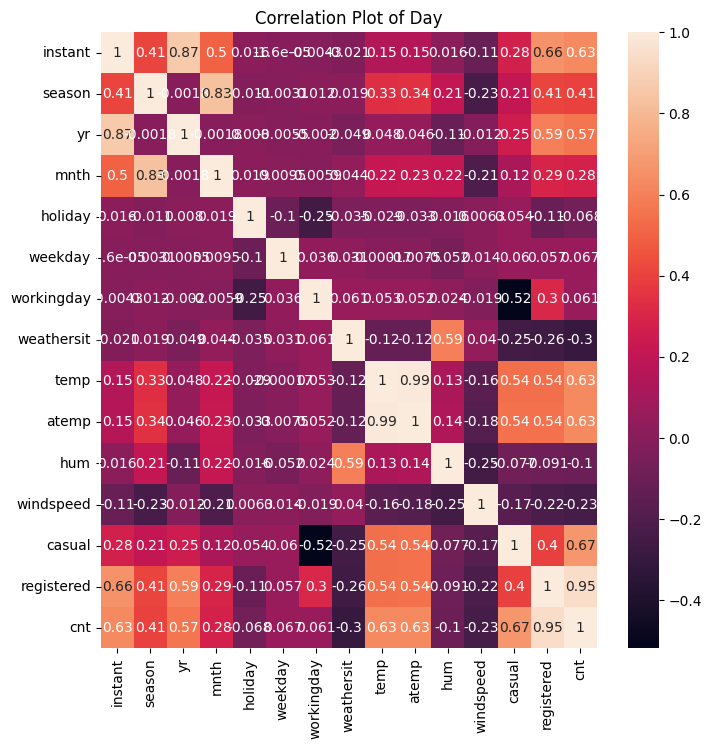

In [24]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_day.corr(),annot=True)
plt.title('Correlation Plot of Day')
plt.show()

Dari hasil korelasi antar fitur diatas dapat diketahui tiap fitur saling mempengaruhi satu sama lain. Dan terlihat bahwa kolom/fitur yang mempengaruhi nilai **cnt** paling besar adalah kolom **instant, holiday, casual, dan registered**.

In [25]:
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


# **Bagaimanakah tren jumlah sewa bike sharing dalam pertahun?**

In [60]:
plt.style.use('Solarize_Light2')

In [61]:
df_2011 = df_day[df_day['yr'] == 0]

In [62]:
df_2012 = df_day[df_day['yr'] == 1]

In [63]:
month = df_2011['mnth'].unique()
total = df_2011.groupby('mnth').sum()
totals = total['cnt'].to_numpy()

<ipython-input-63-7f14e092f4f1>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total = df_2011.groupby('mnth').sum()


In [64]:
jumlah_sewa = total['cnt']

In [65]:
jumlah_sewa

mnth
1      38189
2      48215
3      64045
4      94870
5     135821
6     143512
7     141341
8     136691
9     127418
10    123511
11    102167
12     87323
Name: cnt, dtype: int64

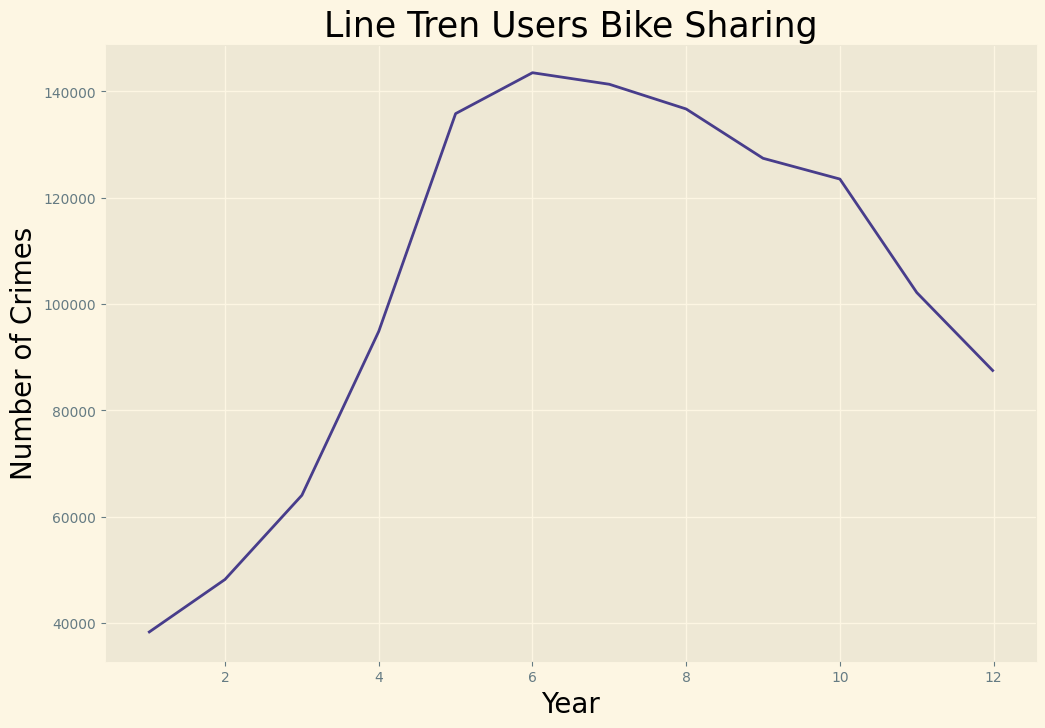

In [66]:
# Membuat Line Plot
jumlah_sewa.plot(kind='line', color='darkslateblue', figsize=(12,8))
plt.title('Line Tren Users Bike Sharing', fontsize=25)
plt.xlabel('Year', fontsize=20, color='black')
plt.ylabel('Number of Crimes', fontsize=20, color='black')
plt.show()

In [67]:
month2 = df_2012['mnth'].unique()
total2 = df_2012.groupby('mnth').sum()
totals2 = total['cnt'].to_numpy()

<ipython-input-67-90a3d5c6063b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total2 = df_2012.groupby('mnth').sum()


In [68]:
jumlah_sewa2 = total2['cnt']

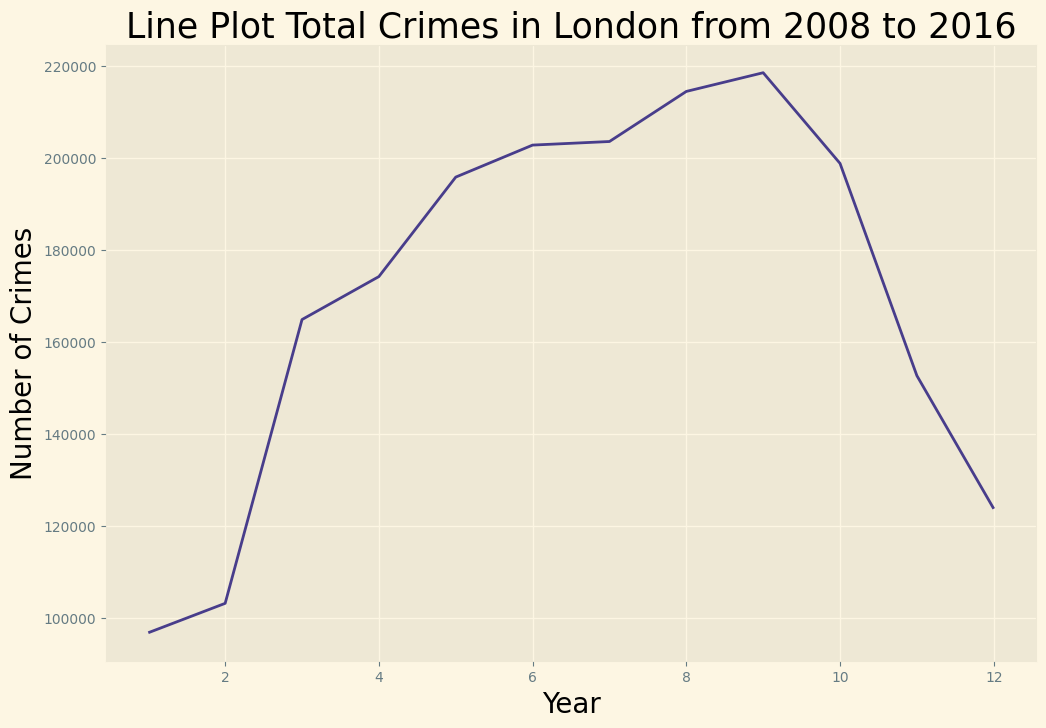

In [69]:
# Membuat Line Plot
jumlah_sewa2.plot(kind='line', color='darkslateblue', figsize=(12,8))
plt.title('Line Plot Total Crimes in London from 2008 to 2016', fontsize=25)
plt.xlabel('Year', fontsize=20, color='black')
plt.ylabel('Number of Crimes', fontsize=20, color='black')
plt.show()

##**Distribusi dari Tiap Fitur**

In [35]:
def diagnostic_plots(df_day,variable):
    plt.figure(figsize=(16,6))

    #Histogram
    plt.subplot(1,2,1)
    sns.histplot(df_day[variable],bins=30)
    plt.title(f'Histogram plot {variable}')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y=df_day[variable])
    plt.title(f'Boxplot {variable}')

    plt.show()

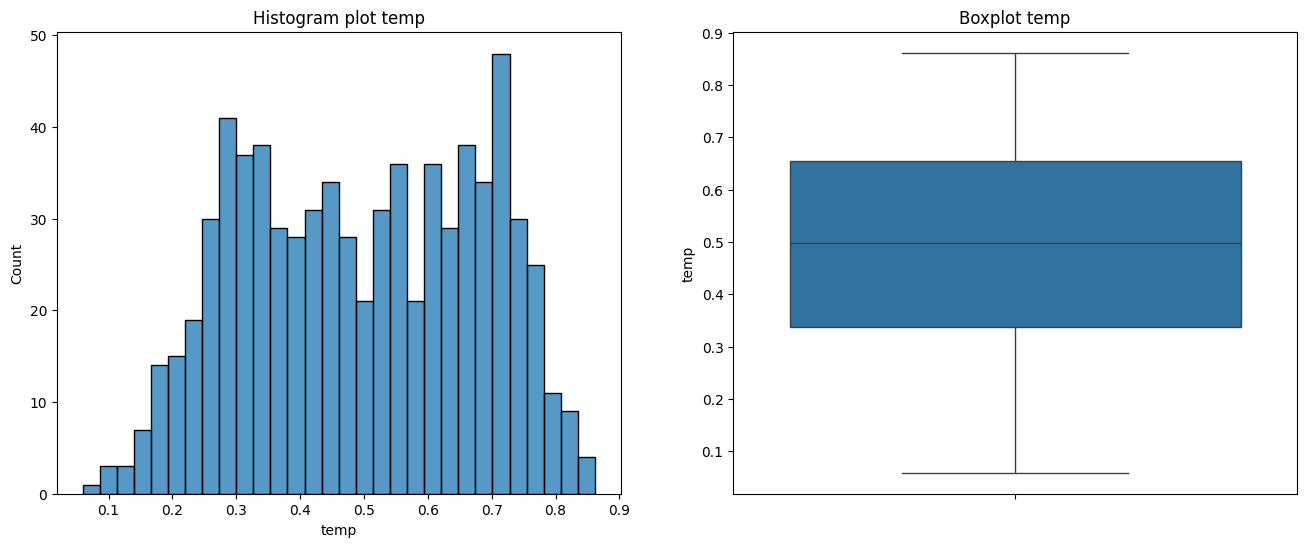

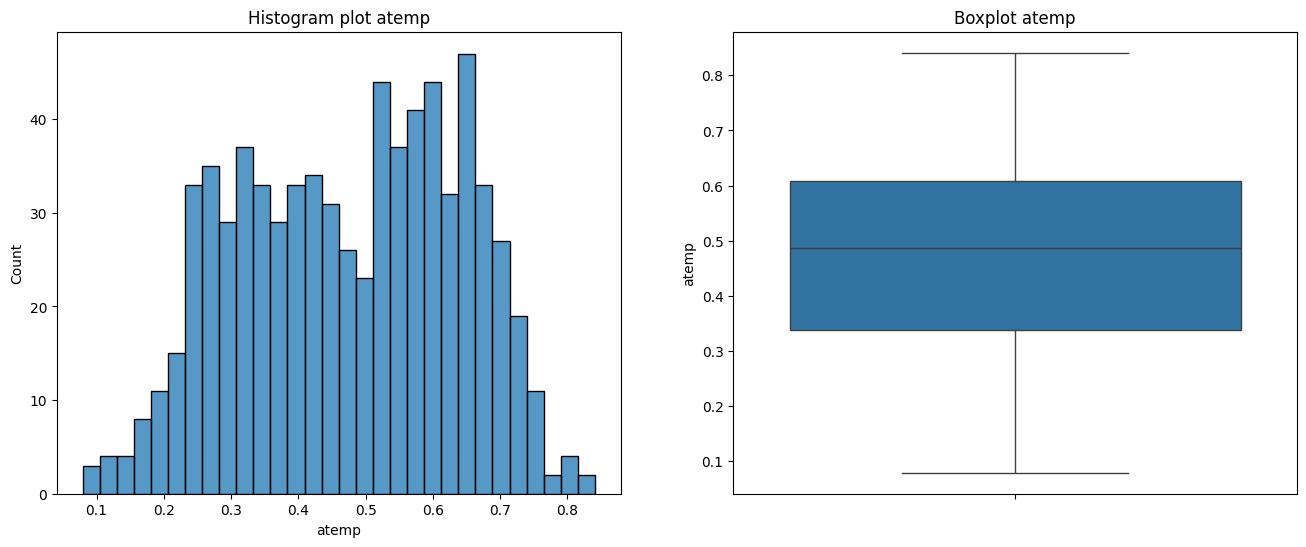

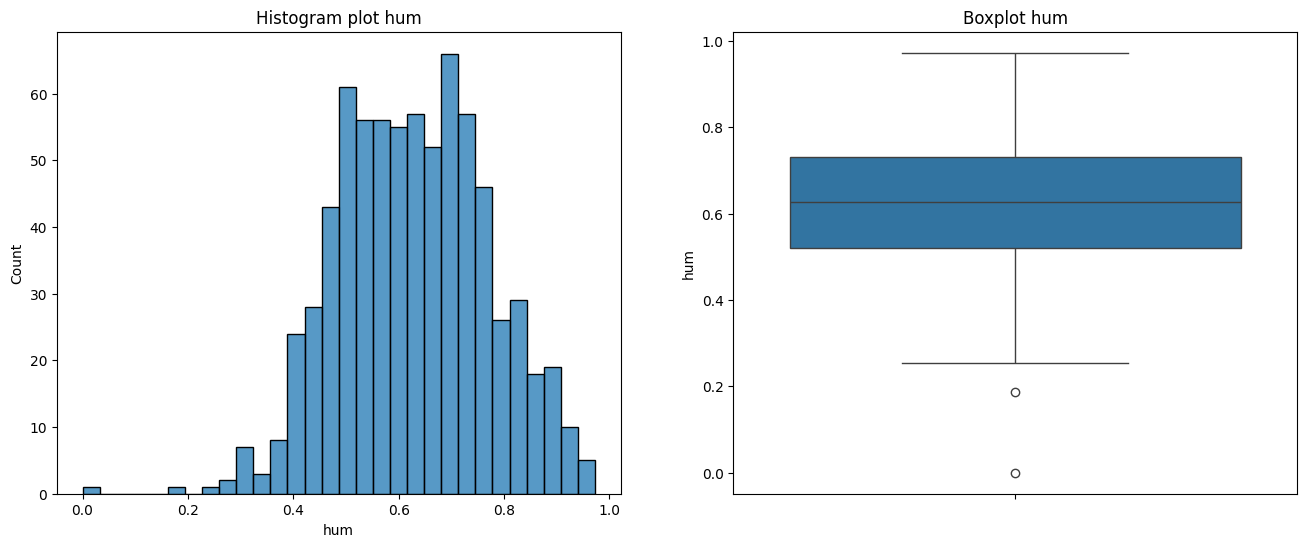

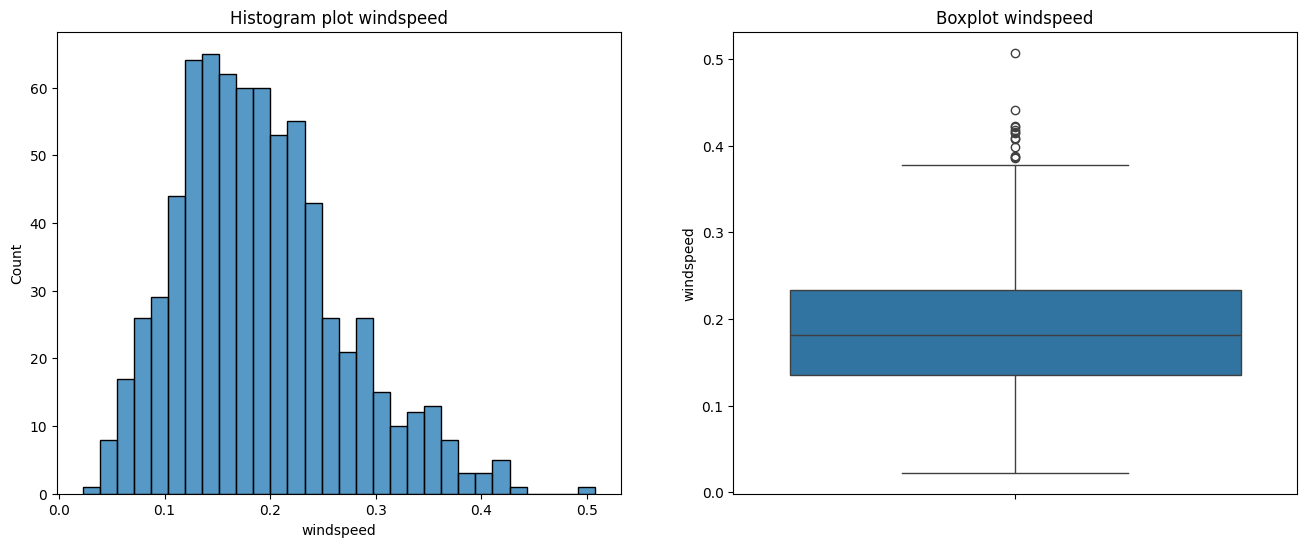

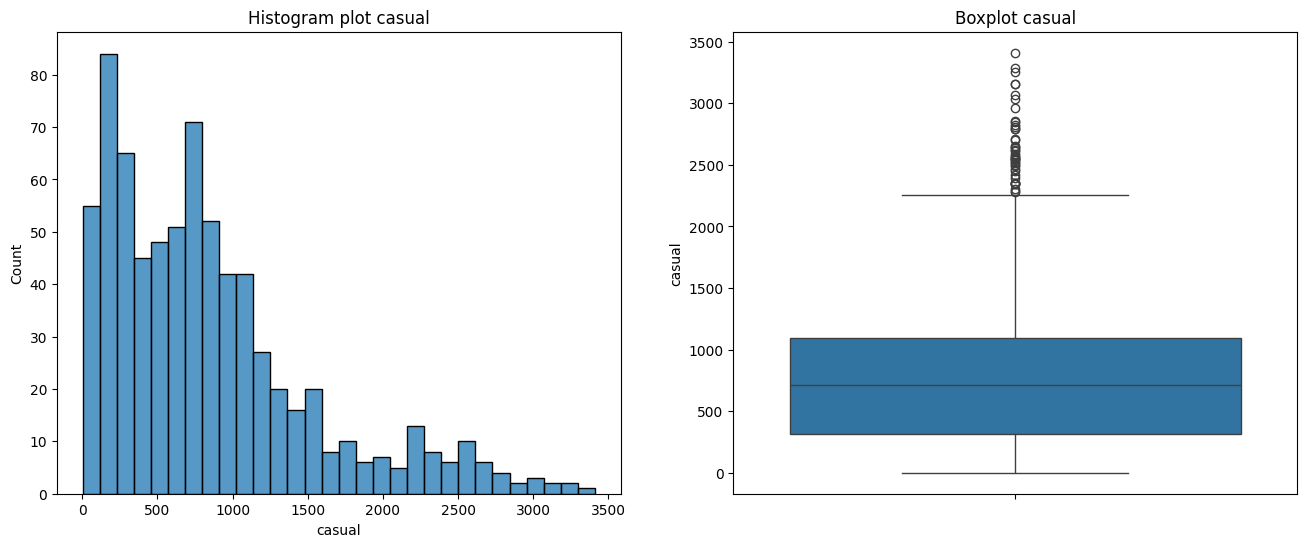

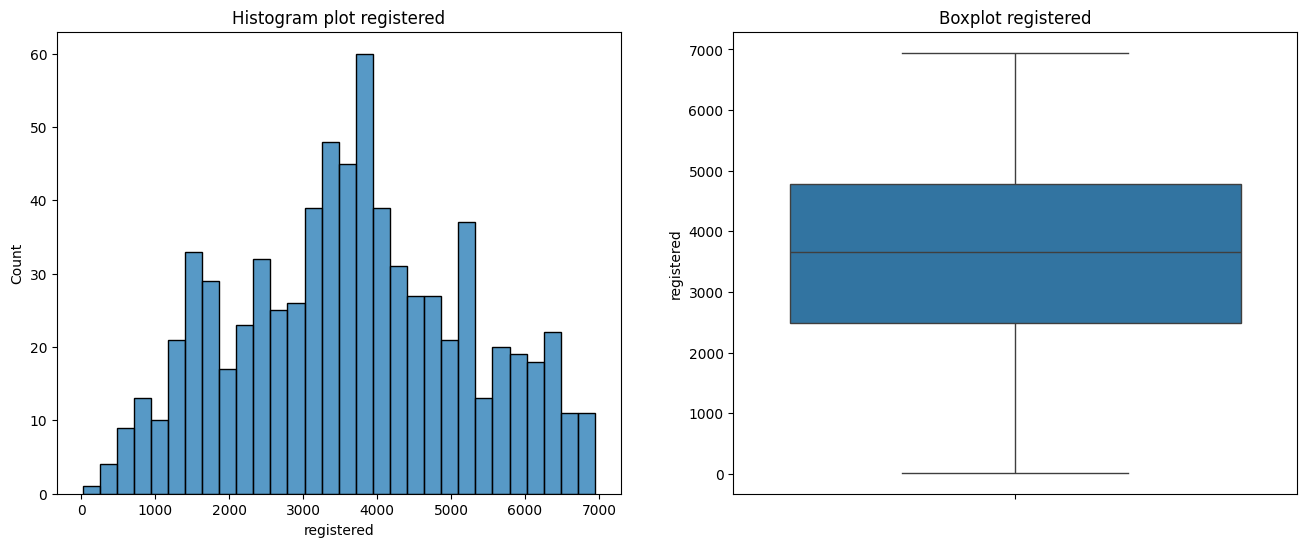

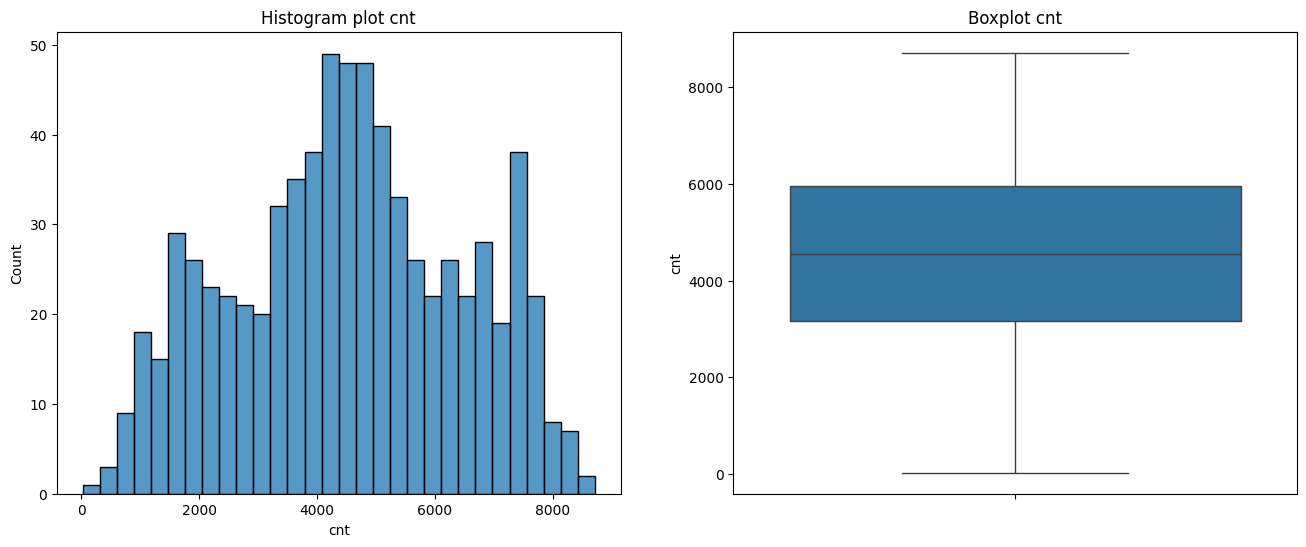

In [36]:
diagnostic_plots(df_day, 'temp')
diagnostic_plots(df_day, 'atemp')
diagnostic_plots(df_day, 'hum')
diagnostic_plots(df_day, 'windspeed')
diagnostic_plots(df_day, 'casual')
diagnostic_plots(df_day, 'registered')
diagnostic_plots(df_day, 'cnt')

Dari BoxPlot diatas dapat terlihat bahwa beberapa kolom terdapat memiliki pencilan atau outlier seperti pada kolom **hum, windspeed, dan casual**

#**Bagaimanakah pengaruh dari musim terhadap jumlah sewa bike sharing?**


In [37]:
def diagnostic_plots(df_day,variable):
    plt.figure(figsize=(6,6))

    #Histogram
    sns.barplot(df_day[variable].value_counts().reset_index(), x='index', y=variable)
    plt.title(f'Barplot Day {variable}')

    plt.show()

In [75]:
df_season = df_day.groupby(by='season').instant.nunique().reset_index()
df_season.rename(columns={
    'instant': 'total'
}, inplace=True)
df_season

,season,total
0,1,181
1,2,184
2,3,188
3,4,178


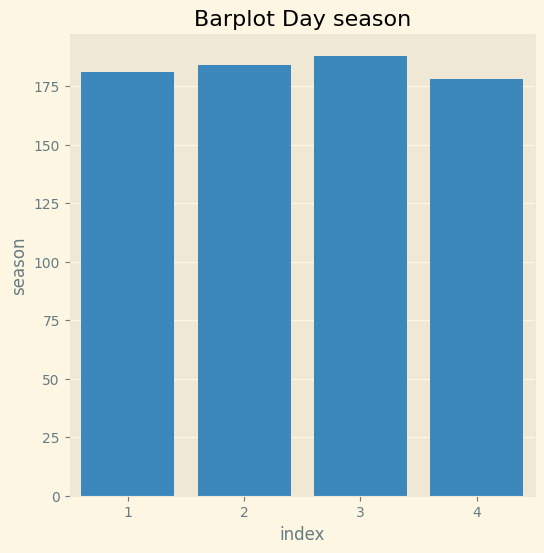

In [73]:
diagnostic_plots(df_day, 'season')


# **Bagaimanakah pengaruh cuaca terhadap jumlah sewa bike sharing?**


In [76]:
df_weathers = df_day.groupby(by='weathersit').instant.nunique().reset_index()
df_weathers.rename(columns={
    'instant': 'total'
}, inplace=True)
df_weathers

,weathersit,total
0,1,463
1,2,247
2,3,21


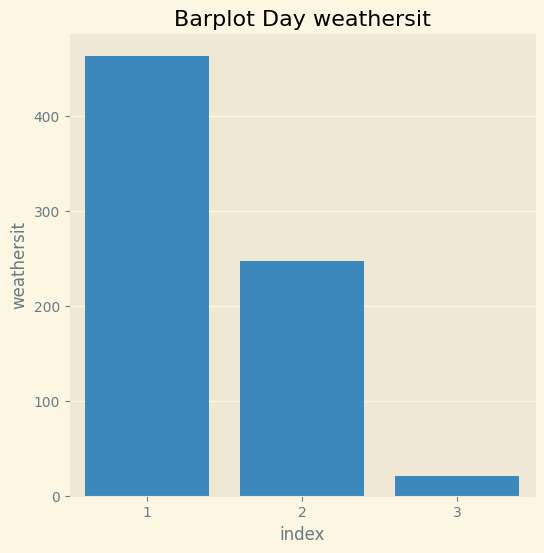

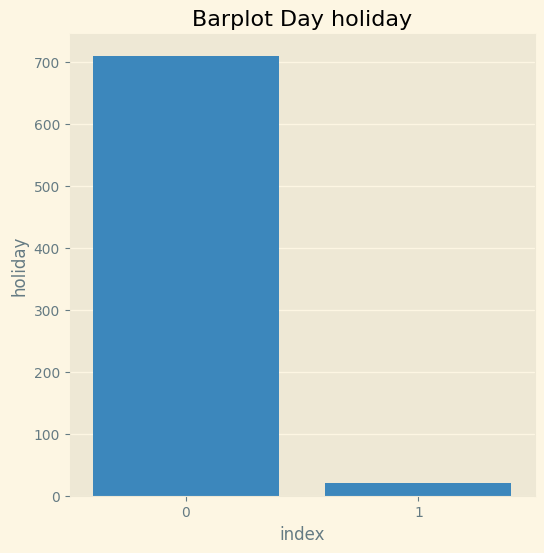

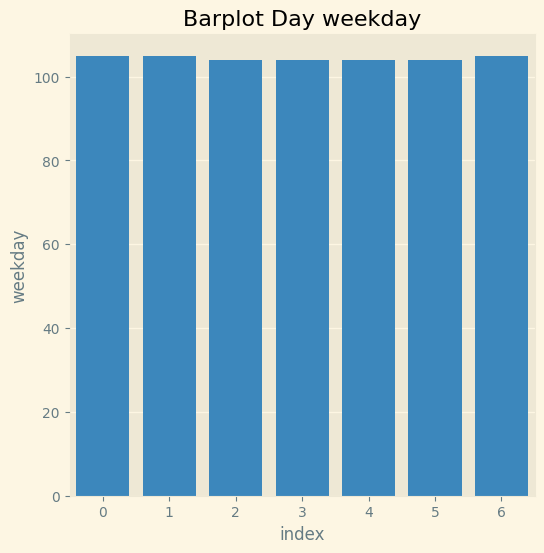

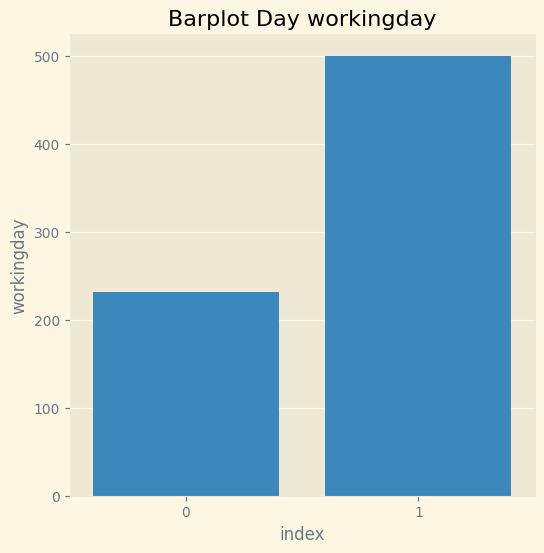

In [74]:
diagnostic_plots(df_day, 'weathersit')
diagnostic_plots(df_day, 'holiday')
diagnostic_plots(df_day, 'weekday')
diagnostic_plots(df_day, 'workingday')

# **Bagaimanakah perbandingan user registered dengan casual?**

In [80]:
total_casual = df_day['casual'].sum()
total_registered = df_day['registered'].sum()
total = [total_casual,total_registered]
total

[620017, 2672662]

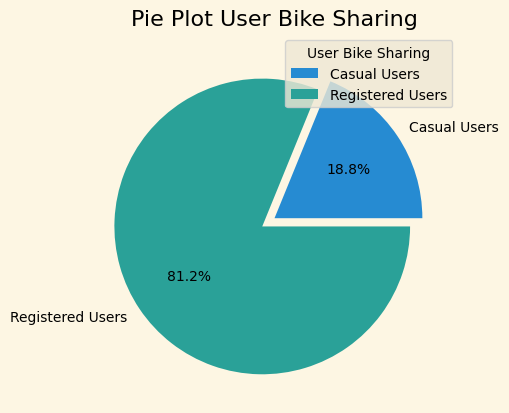

In [87]:
plt.pie([total_casual, total_registered],
        labels=["Casual Users", "Registered Users"],explode=(0,0.1),autopct='%1.1f%%')

plt.legend(title = "User Bike Sharing", loc='upper right')
plt.title('Pie Plot User Bike Sharing')
plt.show()

#**Conclusion**

**- Bagaimanakah tren jumlah sewa bike sharing dalam pertahun?**

Dari hasil analisis diketahui bahwa terjadinya fluktuasi terhadap user yang menyewa sepeda dengan puncak peningkatan terjadi pada bulan agustus sebanyak 143.512 pengguna dan terjadinya penurunan yang masif pada bulan Desember mencapai 8000 user.


**Bagaimanakah pengaruh dari musim terhadap jumlah sewa bike sharing?**

Dari hasil analisis terlihat bahwa musim tidak terlalu mempengaruhi dari jumlah user yang menyewa sepeda pada Bike Sharing

**Bagaimanakah pengaruh cuaca terhadap jumlah sewa bike sharing?**


Melihat dari barplot yang telah dibuat bahwa cuaca memiliki pengaruh yang sangat besar dalam mengasilkan jumlah user yang lebih banyak dengan jumlah yang paling banyak terdapat pada cuaca berawan, dan jumlah yang paling sedikit pada cuaca hujan, bersalju, atau badai

**Bagaimanakah perbandingan user registered dengan casual?**

Dari pie plot diatas diketahui bahwa banyak dari user merupakan user/pengguna yang terdaftar dibandingkan dengan pengguna biasa atau kasual dengan perbandingan sebesar 81.2% dengan 18.8%

**Saran**

Berikut merupakan saran yang dapat dlakukan oleh perusahan Bike Sharing dalam meningkatkan jumlah user yang menyewa sepeda, seperti dengan melakukan promosi seperti potongan harga terutama pada cuaca yang kurang mendukung seperti cuaca hujan dan bersalju.

Dapat juga dengan membuat suatu inovasi seperti mendapatkan gratis jas hujan untuk melindungi pengguna ketika bersepeda saat terjadinya hujan.


# **Teknik Analisis Lanjutan**

## **RFM Analysis**

In [111]:
current_date = max(df_day['dteday'])
rfm = df_day.groupby('registered').agg({
    'dteday': lambda x: (current_date-x.max()).days,  # Recency
    'instant': 'count',  # Frequency
    'cnt': 'sum'  # Monetary
}).reset_index()

# Mengganti nama kolom
rfm.columns = ['Registered', 'Recency', 'Frequency', 'Monetary']

print(rfm.head())

   Registered  Recency  Frequency  Monetary
0          20       63          1        22
1         416      704          1       431
2         432        5          1       441
3         451      372          1       754
4         472      705          1       506


RFM (Recency, Frequency, Monetary) analysis adalah teknik analisis yang digunakan untuk mengevaluasi perilaku pelanggan berdasarkan tiga dimensi utama yaitu :

- Recency (Ketajaman): Seberapa baru pelanggan telah melakukan pembelian atau interaksi dengan bisnis. Semakin baru interaksi tersebut, semakin tinggi nilai ketajaman.

- Frequency (Frekuensi): Seberapa sering pelanggan melakukan pembelian atau interaksi dengan bisnis dalam periode waktu tertentu. Semakin sering pelanggan berinteraksi, semakin tinggi nilai frekuensinya.

- Monetary (Moneter): Seberapa banyak uang yang dihabiskan pelanggan dalam pembelian atau interaksi dengan bisnis. Semakin besar jumlah uang yang dihabiskan, semakin tinggi nilai moneter.

## **Clustering Analysis**

In [107]:
df_day['weather_situation'] = df_day['weathersit'].replace({1: 'Clear', 2: 'Misty', 3: 'RainSnow'})

In [108]:
df_day.groupby(by="weather_situation").cnt.nunique().sort_values(ascending=False)

weather_situation
Clear       451
Misty       243
RainSnow     21
Name: cnt, dtype: int64

Clustering analisis digunakan untuk mengelompokkan suatu data berdasarkan kesamaan karakteristiknya
